<a href="https://colab.research.google.com/github/2303A51744/Data-Mining/blob/main/ADMLAB04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# create a systhetic dataset
np.random.seed(42)
data=np.random.normal(0,1,100)
outliers=np.random.normal(5,10,5)
data_with_outliers=np.concatenate((data,outliers))


In [8]:
data

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [10]:
outliers

array([-9.15370742,  0.79354677,  1.57285483, -3.02277269,  3.38714288])

In [11]:
data_with_outliers

array([ 4.96714153e-01, -1.38264301e-01,  6.47688538e-01,  1.52302986e+00,
       -2.34153375e-01, -2.34136957e-01,  1.57921282e+00,  7.67434729e-01,
       -4.69474386e-01,  5.42560044e-01, -4.63417693e-01, -4.65729754e-01,
        2.41962272e-01, -1.91328024e+00, -1.72491783e+00, -5.62287529e-01,
       -1.01283112e+00,  3.14247333e-01, -9.08024076e-01, -1.41230370e+00,
        1.46564877e+00, -2.25776300e-01,  6.75282047e-02, -1.42474819e+00,
       -5.44382725e-01,  1.10922590e-01, -1.15099358e+00,  3.75698018e-01,
       -6.00638690e-01, -2.91693750e-01, -6.01706612e-01,  1.85227818e+00,
       -1.34972247e-02, -1.05771093e+00,  8.22544912e-01, -1.22084365e+00,
        2.08863595e-01, -1.95967012e+00, -1.32818605e+00,  1.96861236e-01,
        7.38466580e-01,  1.71368281e-01, -1.15648282e-01, -3.01103696e-01,
       -1.47852199e+00, -7.19844208e-01, -4.60638771e-01,  1.05712223e+00,
        3.43618290e-01, -1.76304016e+00,  3.24083969e-01, -3.85082280e-01,
       -6.76922000e-01,  

In [7]:
# convert to dataframe
df=pd.DataFrame(data_with_outliers,columns=['Values'])

In [12]:
df

,Values
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,-9.153707
101,0.793547
102,1.572855
103,-3.022773


In [14]:
# step 1: detect outliers using IQR method
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [15]:
  Q1

-0.6017066122293969

In [17]:
Q3

0.5132674331133561

In [19]:
IQR

1.114974045342753

In [20]:
lower_bound

-2.2741676802435267

In [21]:
upper_bound

2.185728501127486

In [22]:
# Identifying outliers based on IQR
outliers_iqr=df[(df['Values']<lower_bound) | (df['Values']>upper_bound)]

In [23]:
outliers_iqr

,Values
74,-2.619745
100,-9.153707
103,-3.022773
104,3.387143


In [24]:
# step 2: detect outliers using z-score method
z_scores=stats.zscore(df['Values'])
outliers_zscore=df[np.abs(z_scores)>3]

In [26]:
z_scores

,Values
0,0.491436
1,0.016318
2,0.604402
3,1.259370
4,-0.055431
...,...
100,-6.729430
101,0.713539
102,1.296652
103,-2.141997


In [27]:
outliers_zscore

,Values
100,-9.153707


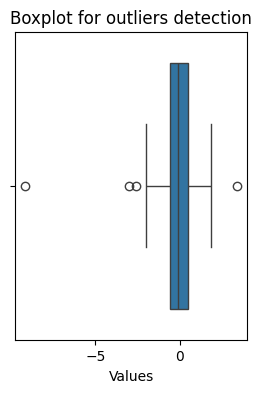

In [34]:
# step 3: Visualize outliers using a boxplot
plt.figure(figsize=(3,4))
sns.boxplot(x=df['Values'])
plt.title("Boxplot for outliers detection")
plt.show()

In [35]:
# step 4: Handle outliers
# capping set outliers to the upper and lower bounds
df_capped=df.copy()
df_capped['Values']=np.clip(df_capped['Values'],lower_bound,upper_bound)

In [39]:
df_capped['Values']

,Values
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,-2.274168
101,0.793547
102,1.572855
103,-2.274168


In [47]:
# Removal: Drop rows with outliers
df_removed=df.copy()
df_removed=df_removed[(df_removed['Values']>=lower_bound) & (df_removed['Values']<=upper_bound)]

In [48]:
df_removed

,Values
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
97,0.261055
98,0.005113
99,-0.234587
101,0.793547


In [51]:
# imputation replace outliers with the median
df_imputed=df.copy()
median_value=df_imputed['Values'].median()
df_imputed['Values']=np.where((df_imputed['Values']<lower_bound) | (df_imputed['Values']>upper_bound),median_value,df_imputed['Values'])

In [52]:
df_imputed

,Values
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,-0.115648
101,0.793547
102,1.572855
103,-0.115648


In [53]:
median_value

-0.11564828238824053

In [54]:
df_imputed['Values']

,Values
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,-0.115648
101,0.793547
102,1.572855
103,-0.115648


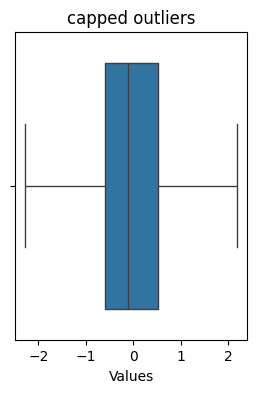

In [55]:
# step 5: visualize handled data
# capped data
plt.figure(figsize=(3,4))
sns.boxplot(x=df_capped['Values'])
plt.title("capped outliers")
plt.show()

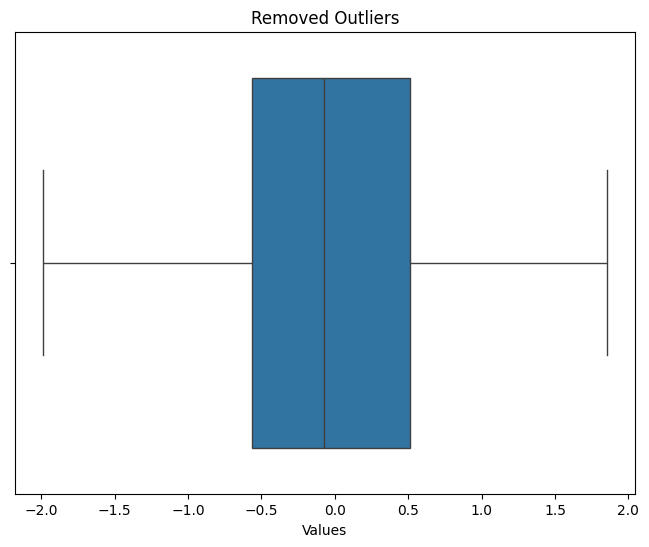

In [57]:
# Removed data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_removed['Values']) # Changed 'Value' to 'Values'
plt.title("Removed Outliers")
plt.show()


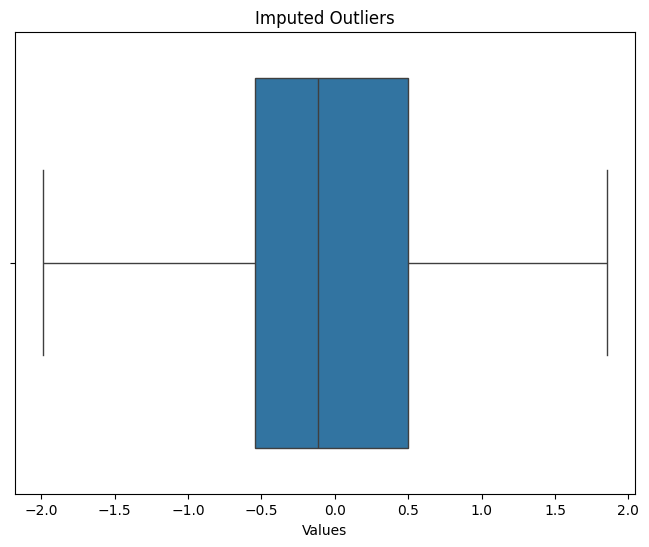

In [59]:
# Imputed data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputed['Values']) # Changed 'Value' to 'Values'
plt.title("Imputed Outliers")
plt.show()